In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from scipy import stats, optimize
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge

from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import explained_variance_score, r2_score, median_absolute_error

print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The numpy version is {}.'.format(np.__version__))

The scikit-learn version is 0.18.1.
The pandas version is 0.19.2.
The numpy version is 1.12.0.


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read the CSV 
We use pandas `read_csv(path/to/csv)` method to read the csv file. Next, replace the missing values with `np.NaN` i.e. Not a Number. This way we can count the number of missing values per column.

In [3]:
df = pd.read_csv('../datasets/UCIrvineCrimeData.csv');
df = df.replace('?',np.NAN)
features = [x for x in df.columns if x not in ['state', 'community', 'communityname', 'county'
                                               , 'ViolentCrimesPerPop']]

# Find the number of missing values in every column

In [4]:
df.isnull().sum()

state                      0
county                  1174
community               1177
communityname              0
fold                       0
population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
                        ... 
PctSameHouse85             0
PctSameCity85              0
PctSameState85             0
LemasSwornFT  

# Eliminating samples or features with missing values

One of the easiest ways to deal with missing values is to simply remove the corresponding features(columns) or samples(rows) from the dataset entirely. Rows with missing values can be easily dropped via the dropna method.

In [5]:
df.dropna()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
16,36,1,1000,Albanycity,1,0.15,0.31,0.40,0.63,0.14,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
23,19,193,93926,SiouxCitycity,1,0.11,0.43,0.04,0.89,0.09,...,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09,0.63
33,51,680,47672,Lynchburgcity,1,0.09,0.43,0.51,0.58,0.04,...,0.14,0.11,0.19,0.05,0.01,0.75,0,0.60,0.1,0.31
68,34,23,58200,PerthAmboycity,1,0.05,0.59,0.23,0.39,0.09,...,0.01,0.73,0.28,0,0.02,0.64,0,1.00,0.23,0.50
74,9,9,46520,Meridentown,1,0.08,0.39,0.08,0.85,0.04,...,0.07,0.21,0.04,0.02,0.01,0.7,1,0.44,0.11,0.14
80,36,119,84000,Yonkerscity,1,0.29,0.42,0.27,0.64,0.18,...,0.05,0.87,1.00,0.21,0.14,0.69,0.5,0.61,0.34,0.30
95,25,17,37875,Maldencity,1,0.07,0.34,0.08,0.84,0.32,...,0.01,0.89,1.00,0,0.01,0.88,0,0.35,0.09,0.37
99,33,11,45140,Manchestercity,1,0.14,0.34,0.02,0.96,0.07,...,0.09,0.25,0.08,0.01,0.02,0.79,0,0.44,0.1,0.09
134,34,31,13690,Cliftoncity,1,0.10,0.34,0.03,0.89,0.21,...,0.03,0.53,0.32,0.05,0.02,0.75,0,1.00,0.12,0.08
145,25,17,37000,Lowellcity,1,0.15,0.51,0.05,0.71,0.68,...,0.04,0.63,0.16,0,0.02,0.68,0,1.00,0.12,0.53


   Similarly, we can drop columns that have atleast one `NaN` in any row by setting the axis argument to 1:

In [6]:
df.dropna(axis=1);

The `dropna()` method supports additional parameters that can come in handy.

In [7]:
#only drop rows where all columns are null
df.dropna(how='all');

In [8]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4);

In [9]:
# only drop rows where NaN appear in specific columns (here :'community')
df.dropna(subset=['community']);

# Imputing missing values

Often, the removal of samples or dropping of entire feature columns is simply not feasible, because we might lost too much valuable data. In this case, we can use different interpolation techniques to estimate the missing values from the othere training samples in our dataset. One of the most common interpolation technique is mean interpolation, where we simply replace the missing value by the mean value of the entire feature column. A convenient way to achieve this is using the `Imputer` class from the `scikit-learn` as shown in the following code.

In [10]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df[features])
imputed_data = imr.transform(df[features]);

# Sklearn fundamentals 

A convenient way to randomly partition the dataset into a separate test & training dataset is to use the `train_test_split` function from `scikit-learn's` `cross_validation` submodule 

In [11]:
#df = df.drop(["communityname", "state", "county", "community"], axis=1)
X, y = imputed_data, df['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0);

First, we assigned the NumPy array representation of features columns to the variable X, and we assigned the predicted variable to the variable `y`. Then we used the `train_test_split` function to randomly split `X` and `y` into separate training & test datasets. By setting `test_size=0.3` we assigned 30 percent of samples to X_test and the remaining 70 percent to X_train.

# Sequential Feature Selection algorithm : Sequential Backward Algorithm(SBS)

Sequential feature selection algorithms are a family of greedy search algorithms that can reduce an initial d-dimensional feature space into a k-dimensional feature subspace where k < d. The idea is to select the most relevant subset of features to improve computational efficieny and reduce generalization error

In [12]:
class SBS():
    def __init__(self, estimator, features, 
                 scoring=r2_score, test_size=0.25,
                random_state=1):
        self.scoring = scoring
        self.estimator = estimator
        self.features = features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                           y, 
                                                           test_size = self.test_size,
                                                           random_state = self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(score)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [13]:
clf = LinearRegression()
sbs = SBS(clf, features=1)
sbs.fit(X_train, y_train)

<__main__.SBS instance at 0x7f55930920e0>

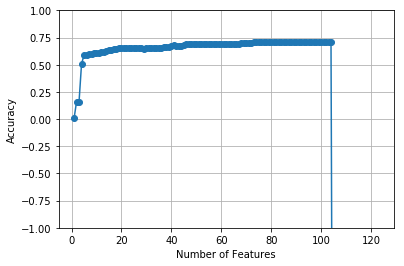

In [14]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([-1, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.grid()
plt.show()